## Explorando o dataset

Link para o dataset utilizado: https://www.kaggle.com/datasets/quadeer15sh/augmented-forest-segmentation/code

In [4]:
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dataset_dir = '/content/drive/Shareddrives/grupo2-AR3S/Datasets/drone_images'

### Abordagem 01

Utilizando PIL para carregar as imagens em formato padrão. Útil para fazer operações específicar sobre as imagens, individualmente.

In [14]:
from PIL import Image

image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg') or f.endswith('.png')]

images = []
for image_file in image_files:
    image_path = os.path.join(dataset_dir, image_file)
    image = Image.open(image_path)
    images.append(image)

print(f"Total de imagens carregadas: {len(images)}")

Total de imagens carregadas: 5


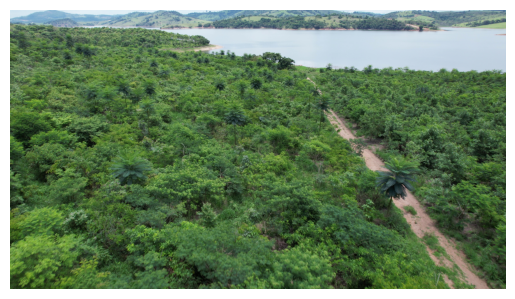

In [16]:
plt.imshow(images[3])
plt.axis('off')
plt.show()

Redimensionamento das imagens do dataset:

In [17]:
images_resized = [image.resize((224, 224)) for image in images]

Conversão para arrays numpy:

In [18]:
# Converte as imagens redimensionadas para arrays NumPy
image_arrays = [np.array(image) for image in images_resized]

# Converte para um único array de dados
image_arrays = np.array(image_arrays)

# Exemplo: Visualizar a forma do array de imagens
print(f"Forma do array de imagens: {image_arrays.shape}")

Forma do array de imagens: (5, 224, 224, 3)


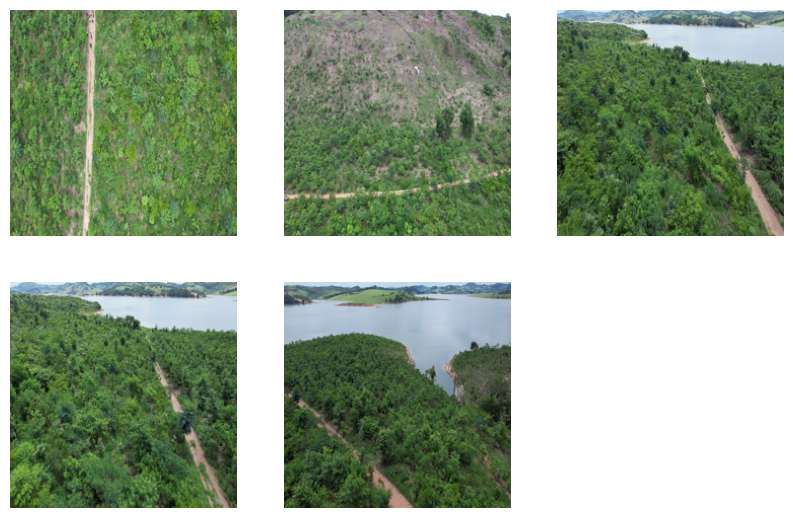

In [24]:
plt.figure(figsize=(10, 10))
for i in range(5):  # Exibe as primeiras 9 imagens
    plt.subplot(3, 3, i+1)
    plt.imshow(images_resized[i])
    plt.axis('off')
plt.show()

In [20]:
# Normalizar as imagens para a faixa [0, 1]
image_arrays_normalized = [np.array(image) / 255.0 for image in images_resized]

Exemplo: aplicação de máscara

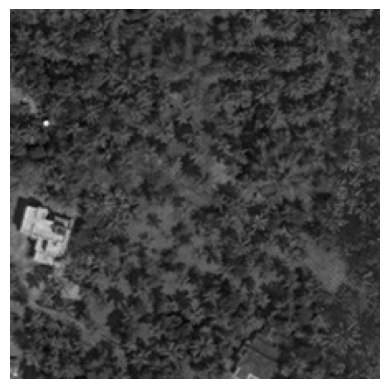

In [9]:
image_gray = images_resized[0].convert('L')

plt.imshow(image_gray, cmap='gray')
plt.axis('off')  # Remove os eixos para uma visualização mais limpa
plt.show()

In [10]:
!pip install DeepForest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.5/39.5 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 46.1 MB/s eta 0:00:00


In [1]:
from deepforest import main

# Carregando o modelo DeepForest
model = main.deepforest()
model.use_release()

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


No validation file provided. Turning off validation loop


NEON.pt: 129MB [00:01, 126MB/s]                           
/usr/local/lib/python3.10/dist-packages/deepforest/main.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self

Model was downloaded and saved to /usr/local/lib/python3.10/dist-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


In [21]:
def detect_trees(image_array):
  # Convertendo o array NumPy de volta para uma imagem PIL
  image = Image.fromarray((image_array * 255).astype(np.uint8))
  image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

  # Salvando a imagem temporariamente para uso com o modelo DeepForest
  temp_image_path = "temp_image.png"
  image.save(temp_image_path)

  # Realizando a predição com DeepForest
  predictions = model.predict_image(path=temp_image_path)

  # Plotando as predições na imagem
  for index, row in predictions.iterrows():
      cv2.rectangle(image_cv2,
                    (int(row['xmin']), int(row['ymin'])),
                    (int(row['xmax']), int(row['ymax'])),
                    (255,0,0), 2)

  # Exibindo a imagem com as detecções
  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB))
  plt.title(f"Imagem com Detecções - Total de Árvores: {len(predictions)}")
  plt.axis('off')
  plt.show()

  return len(predictions)

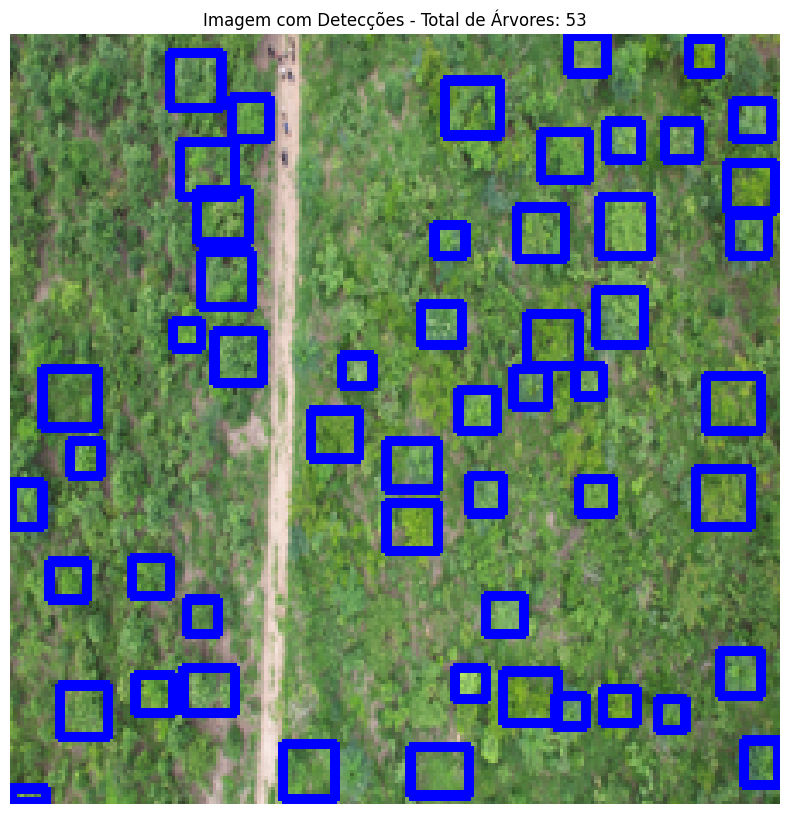

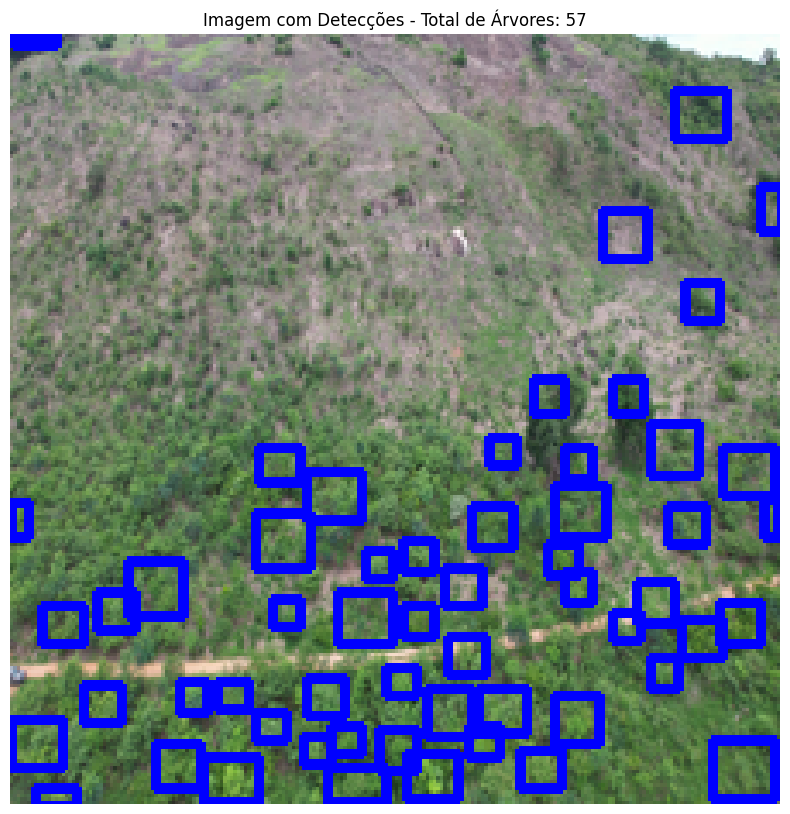

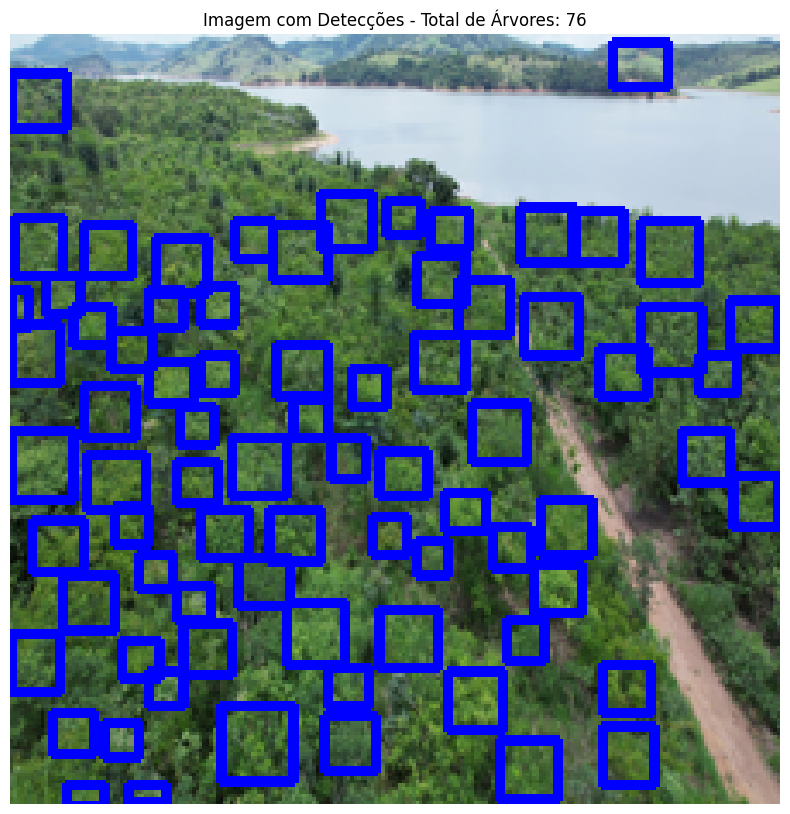

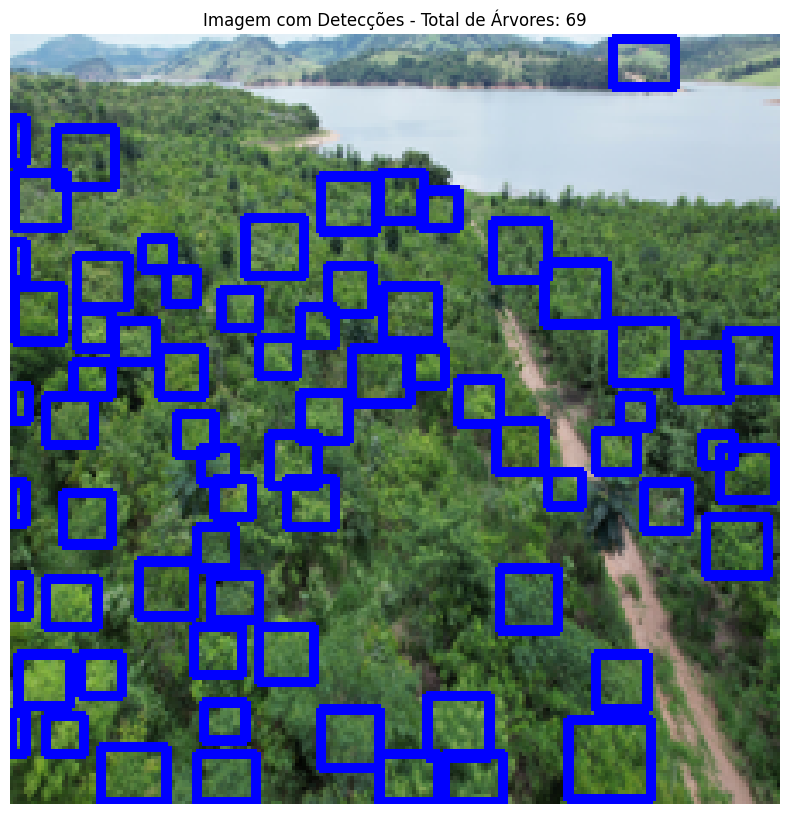

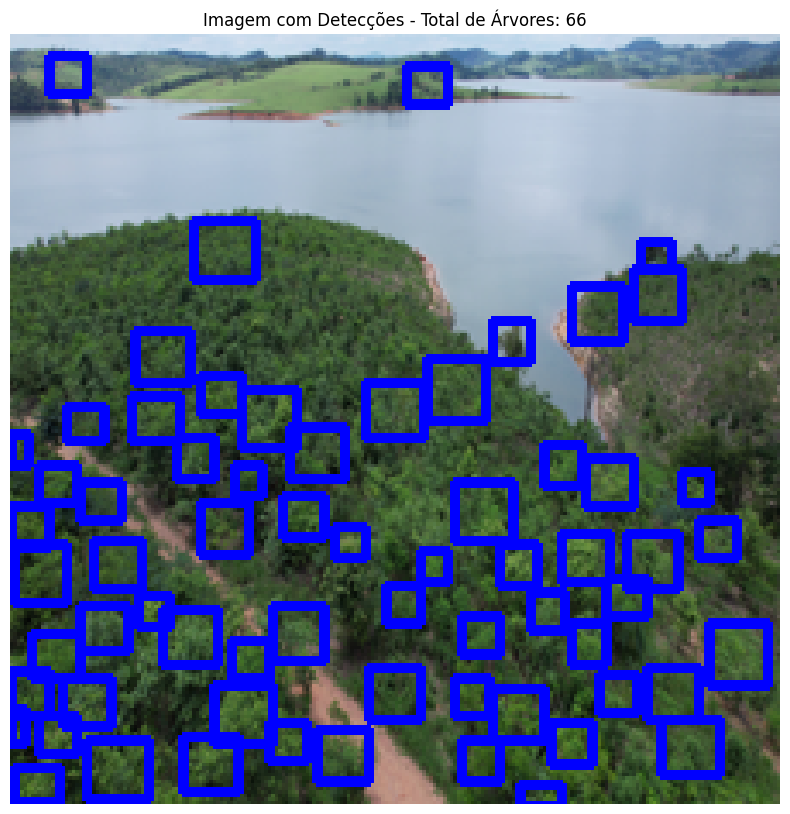

Total de árvores detectadas no dataset: 321


In [22]:
total_trees = 0
for image_array in image_arrays_normalized:
    num_trees = detect_trees(image_array)
    total_trees += num_trees

print(f"Total de árvores detectadas no dataset: {total_trees}")